# M0.212 Research Dissermination and Transfer
# CAE2 - Data Analysis - 2024/2025

## Exercise 1

Generate a random sample of 2000 real numbers.
- Find the confidence interval of such sample with a condifence level of 90%.
- By employing a Chi-squared test, find if your data belongs to a normal or Poisson distribution. To solve this exercise apply two hypothesis contrast, one per distribution. Then find out to which one the null hypothesis H0 the sample belongs to the distribution, prevails. Set a significance level of 10%, alpha = 0.1.

In [8]:
import numpy as np
from scipy import stats

# Step 1: Generate a random sample of 2000 real numbers from a normal distribution
sample = np.random.normal(loc=50, scale=10, size=2000)

# Step 2: Calculate the 90% confidence interval for the sample mean
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # Sample standard deviation
n = len(sample)

# Z-score for 90% confidence
z_score = stats.norm.ppf(0.95)
confidence_interval = (sample_mean - z_score * (sample_std / np.sqrt(n)),
                       sample_mean + z_score * (sample_std / np.sqrt(n)))

print("90% Confidence Interval for the Sample Mean:", confidence_interval)

# Step 3: Perform Chi-squared tests for Normal and Poisson distributions

# Chi-squared test for Normal distribution
# Creating bins for the chi-square test (20 bins)
observed_freq, bin_edges = np.histogram(sample, bins=20)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Expected frequencies for a normal distribution
expected_freq_normal = stats.norm.pdf(bin_centers, loc=sample_mean, scale=sample_std) * n * np.diff(bin_edges)
expected_freq_normal *= observed_freq.sum() / expected_freq_normal.sum()  # Normalize to match observed total

chi_squared_stat_normal, p_value_normal = stats.chisquare(observed_freq, expected_freq_normal)

# Chi-squared test for Poisson distribution
# Estimating lambda (mean rate) for Poisson
lambda_poisson = np.mean(sample)

# Expected frequencies for a Poisson distribution (convert centers to integer for Poisson)
expected_freq_poisson = stats.poisson.pmf(bin_centers.astype(int), mu=lambda_poisson) * n
expected_freq_poisson *= observed_freq.sum() / expected_freq_poisson.sum()  # Normalize to match observed total

chi_squared_stat_poisson, p_value_poisson = stats.chisquare(observed_freq, expected_freq_poisson)

# Display results
print("\nChi-squared Test for Normal Distribution:")
print(f"Chi-squared Statistic: {chi_squared_stat_normal}")
print(f"P-value: {p_value_normal}")

print("\nChi-squared Test for Poisson Distribution:")
print(f"Chi-squared Statistic: {chi_squared_stat_poisson}")
print(f"P-value: {p_value_poisson}")

# Conclusion based on the significance level of 0.1
alpha = 0.1
if p_value_normal > alpha:
    print("\nThe sample data likely follows a Normal distribution (Fail to reject H0 for Normal).")
else:
    print("\nThe sample data likely does not follow a Normal distribution (Reject H0 for Normal).")

if p_value_poisson > alpha:
    print("The sample data likely follows a Poisson distribution (Fail to reject H0 for Poisson).")
else:
    print("The sample data likely does not follow a Poisson distribution (Reject H0 for Poisson).")


90% Confidence Interval for the Sample Mean: (np.float64(49.37148224880811), np.float64(50.09767609324902))

Chi-squared Test for Normal Distribution:
Chi-squared Statistic: 24.916085776111306
P-value: 0.16332294894900862

Chi-squared Test for Poisson Distribution:
Chi-squared Statistic: 28340.11432641371
P-value: 0.0

The sample data likely follows a Normal distribution (Fail to reject H0 for Normal).
The sample data likely does not follow a Poisson distribution (Reject H0 for Poisson).


## Exercise 2

Resolve if the following samples belong to the same population by employing a
non-parametric test of your choice. Preset any parameter such as the significance level
according to your criterion, however, such criterion mustn’t be senseless.

|          | Value 1 | Value 2 | Value 3 | Value 4 | Value 5 | Value 6 | Value 7 | Value 8 | Value 9 | Value 10 | Value 11 | Value 12 |
|----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|----------|----------|----------|
| Sample 1 | 371     | 352     | 397     | 378     | 347     | 366     | 387     | 366     | 378     | 359      | 361      | 382      |
| Sample 2 | 409     | 382     | 361     | 394     | 361     | 382     | 387     | 359     | 397     | 359      | 373      | 382      |

In [3]:
import numpy as np
from scipy.stats import mannwhitneyu

# Data
sample_1 = np.array([371, 352, 397, 378, 347, 366, 387, 366, 378, 359, 361, 382])
sample_2 = np.array([409, 382, 361, 394, 361, 382, 387, 359, 397, 359, 373, 382])

# Perform Mann-Whitney U Test
statistic, p_value = mannwhitneyu(sample_1, sample_2, alternative='two-sided')

# Display the results
print("Mann-Whitney U Test Results:")
print(f"U Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The samples likely come from different populations.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that the samples come from different populations.")

Mann-Whitney U Test Results:
U Statistic: 51.5
P-value: 0.24594176200937112
Fail to reject the null hypothesis. There is no evidence that the samples come from different populations.


## Exercise 3

By employing an ANOVA, resolve if the following samples are or are not independent. Set a
significance level α = 0.05. Solve the exercise:
1. When only helped with a calculator.
2. By using Python

| Sample A | Sample B | Sample C |
| -------- | -------- | -------- |
| 643      | 469      | 484      |
| 655      | 427      | 456      |
| 702      | 525      | 402      |
| 682      | 489      | 431      |
| 647      | 452      | 493      |
| 638      | 510      |          |
| 697      |          |          |

Note that conclusions from 3.1.- and 3.2.- must be the same.

In [4]:
import numpy as np
import scipy.stats as stats

# Data
sample_a = np.array([643, 655, 702, 682, 647, 638, 697])
sample_b = np.array([469, 427, 525, 489, 452, 510])
sample_c = np.array([484, 456, 402, 431, 493])

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(sample_a, sample_b, sample_c)

# Display the results
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the group means, indicating they may not be from the same population.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the group means, suggesting they may come from the same population.")

ANOVA Results:
F-statistic: 77.15453575349866
P-value: 1.2752130033984084e-08
Reject the null hypothesis. There is a significant difference between the group means, indicating they may not be from the same population.


## Exercise 4

Determine if the data below is linearly related and why should be trusted or not the linear fit.

|   | Value 1 | Value 2 | Value 3 | Value 4 | Value 5 | 
|---|---------|---------|---------|---------|---------|
| X | 2.75    | 5.50    | 8.25    | 11.00   | 13.75   |
| Y | 663     | 1247    | 1453    | 2010    | 2371    |

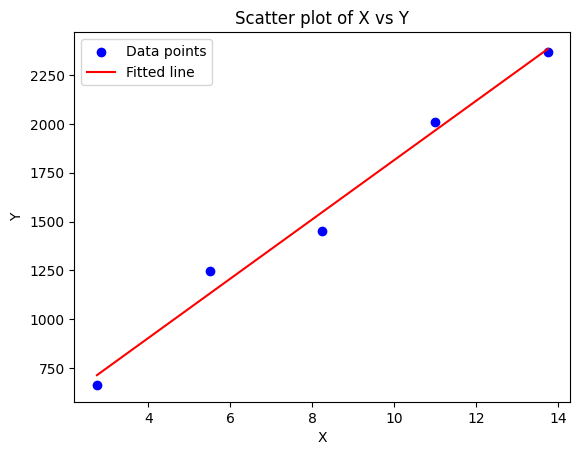

Linear Regression Analysis Results:
Slope: 151.96363636363643
Intercept: 295.0999999999999
R-squared: 0.9846547243920459
P-value for slope: 0.0008105170416138556
Confidence Interval for Slope: [117.10699831 186.82027442]
Confidence Interval for Intercept: [-22.81757219 613.01757219]
The slope is significantly different from zero (p < 0.05), indicating a statistically significant linear relationship between X and Y.
Based on the R-squared value, we can determine how well the model explains the variance in Y.


In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data
X = np.array([2.75, 5.50, 8.25, 11.00, 13.75])
Y = np.array([663, 1247, 1453, 2010, 2371])

# Step 1: Plot the data for a visual inspection
plt.scatter(X, Y, color="blue", label="Data points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of X vs Y")

# Step 2: Perform linear regression
X_with_const = sm.add_constant(X)  # Add intercept term to X for linear regression
model = sm.OLS(Y, X_with_const).fit()

# Plot the regression line
plt.plot(X, model.predict(X_with_const), color="red", label="Fitted line")
plt.legend()
plt.show()

# Step 3: Extract model parameters
slope = model.params[1]
intercept = model.params[0]
r_squared = model.rsquared
p_value = model.pvalues[1]  # P-value for the slope

# Step 4: Confidence intervals for the slope and intercept
conf_int = model.conf_int()

# Output the results
print("Linear Regression Analysis Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_squared}")
print(f"P-value for slope: {p_value}")
print(f"Confidence Interval for Slope: {conf_int[1]}")
print(f"Confidence Interval for Intercept: {conf_int[0]}")

# Step 5: Interpretation of results
if p_value < 0.05:
    print("The slope is significantly different from zero (p < 0.05), indicating a statistically significant linear relationship between X and Y.")
else:
    print("The slope is not significantly different from zero, suggesting no significant linear relationship between X and Y.")

print("Based on the R-squared value, we can determine how well the model explains the variance in Y.")
